## MNIST Dataset 신경망 훈련

* import 

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.3.0'

In [3]:
import tensorflow.keras

In [4]:
tensorflow.keras.__version__

'2.4.0'

In [15]:
import numpy as np

* 데이터 적재

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 6s 1us/step


In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_labels.shape

(10000,)

* 데이터 시각화

In [11]:
import matplotlib.pyplot as plt

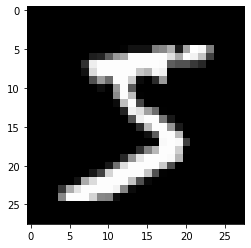

In [13]:
plt.imshow(train_images[0], cmap="gray")

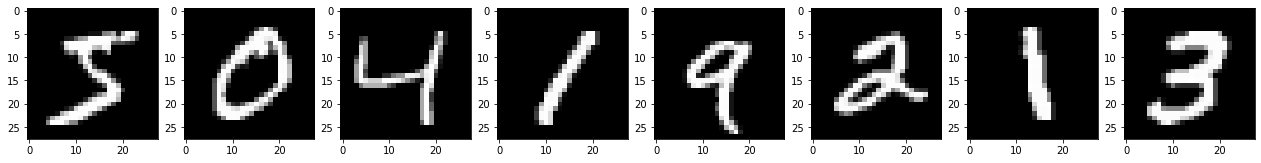

In [14]:
figure, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=8)
for i in range(8):
    axes[i].imshow(train_images[i], cmap="gray")
    

* 데이터 전처리

In [16]:
train_images  = np.array(train_images/255.0, dtype=np.float32)
train_labels  = np.array(train_labels, dtype=np.float32)

In [17]:
test_images  = np.array(test_images/255.0, dtype=np.float32)
test_labels  = np.array(test_labels, dtype=np.float32)

* 모델 생성

In [21]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [70]:
model = Sequential([
    Flatten(input_shape=(28, 28)), 
    Dense(50, activation='sigmoid'),
    Dense(10, activation='softmax')
])

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [30]:
model1 = Sequential()

In [34]:
model1.add(Flatten(input_shape = (28,28)))
model1.add(Dense(50, activation = 'sigmoid'))
model1.add(Dense(50, activation = 'softmax'))

model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                39250     
_________________________________________________________________
flatten_5 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 50)                2550      
_________________________________________________________________
flatten_6 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_13 (Dense)             (None, 50)               

* 모델의 손실함수와 최적화 함수 설정, 학습 수행

In [36]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import CategoricalCrossentropy # 정답이 one-hot encoding 되어 있을때
from tensorflow.keras.metrics import Accuracy

In [71]:
model.compile(optimizer=SGD(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
train_labels.shape

(60000,)

In [39]:
from tensorflow.keras.utils import to_categorical

In [72]:
train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

In [41]:
train_oh_labels.shape

(60000, 10)

In [44]:
train_oh_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [73]:
history = model.fit(x = train_images ,y = train_oh_labels, batch_size=100, validation_split=0.2, epochs=17, verbose=1)

Epoch 1/17
480/480 [==============================] - 1s 2ms/step - loss: 1.0724 - accuracy: 0.7651 - val_loss: 0.5506 - val_accuracy: 0.8760
Epoch 2/17
480/480 [==============================] - 1s 1ms/step - loss: 0.4823 - accuracy: 0.8802 - val_loss: 0.3918 - val_accuracy: 0.8999
Epoch 3/17
480/480 [==============================] - 1s 1ms/step - loss: 0.3845 - accuracy: 0.8965 - val_loss: 0.3378 - val_accuracy: 0.9093
Epoch 4/17
480/480 [==============================] - 1s 2ms/step - loss: 0.3408 - accuracy: 0.9051 - val_loss: 0.3080 - val_accuracy: 0.9138
Epoch 5/17
480/480 [==============================] - 1s 2ms/step - loss: 0.3141 - accuracy: 0.9115 - val_loss: 0.2887 - val_accuracy: 0.9193
Epoch 6/17
480/480 [==============================] - 1s 1ms/step - loss: 0.2945 - accuracy: 0.9159 - val_loss: 0.2745 - val_accuracy: 0.9227
Epoch 7/17
480/480 [==============================] - 1s 1ms/step - loss: 0.2791 - accuracy: 0.9203 - val_loss: 0.2630 - val_accuracy: 0.9258
Epoch 

In [51]:
history.history["loss"]

[0.964806854724884,
 0.43339803814888,
 0.35371333360671997,
 0.31624045968055725,
 0.2918763756752014,
 0.273512065410614,
 0.2585127055644989,
 0.24579311907291412,
 0.23451942205429077,
 0.2248051017522812,
 0.21596692502498627,
 0.20797178149223328,
 0.2008369415998459,
 0.1942545771598816,
 0.1880318820476532,
 0.1823503077030182,
 0.17708510160446167]

In [52]:
history.history["accuracy"]

[0.7868833541870117,
 0.88714998960495,
 0.9028499722480774,
 0.9112333059310913,
 0.917116641998291,
 0.9229833483695984,
 0.9261333346366882,
 0.9305166602134705,
 0.9334166646003723,
 0.9362333416938782,
 0.9388833045959473,
 0.9406833052635193,
 0.9429333209991455,
 0.9449499845504761,
 0.9465500116348267,
 0.9482499957084656,
 0.9496333599090576]

* 시험 데이터로 예측

In [54]:
predict_prob = model.predict(test_images)

In [55]:
predict_prob.shape

(10000, 10)

In [58]:
predict_prob[0]

array([7.04382110e-05, 1.12267787e-06, 1.60548036e-04, 1.10466708e-03,
       5.24172606e-07, 9.74676077e-05, 5.62731683e-09, 9.98276353e-01,
       1.51681825e-05, 2.73695623e-04], dtype=float32)

In [59]:
test_images.shape

(10000, 28, 28)

In [64]:
test0_predict_prob = model.predict(np.reshape(test_images[0] , (-1, 28, 28)))

In [65]:
test0_predict_prob

array([[7.0438138e-05, 1.1226767e-06, 1.6054788e-04, 1.1046660e-03,
        5.2417209e-07, 9.7467513e-05, 5.6273062e-09, 9.9827635e-01,
        1.5168154e-05, 2.7369510e-04]], dtype=float32)

* 참고 predict 안에 3차원 데이터 넣기

In [67]:
# option 1
np.reshape(test_images[0] , (-1, 28, 28)).shape

(1, 28, 28)

In [68]:
# option 2
np.expand_dims(test_images[0], axis=0).shape

(1, 28, 28)

In [ ]:
# 1. model.compile 
# 2. model.fit
# 3. model.predict
# 4. model.evaluate

* 시험데이터로 모델 성능 검증

In [69]:
model.evaluate(test_images, test_oh_labels, batch_size=100)

100/100 [==============================] - 0s 1ms/step - loss: 0.1767 - accuracy: 0.9475


[0.1767309010028839, 0.9474999904632568]

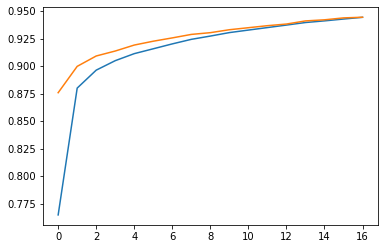

In [74]:
plt.plot(history.history["accuracy"], label = "train")
plt.plot(history.history["val_accuracy"], label = "valid")

## Fashion MNIST Dataset 신경망 훈련

In [75]:
from tensorflow.keras.datasets import fashion_mnist

* 데이터 적재

In [113]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [78]:
train_images.shape

(60000, 28, 28)

In [79]:
test_images.shape

(10000, 28, 28)

* 데이터 시각화

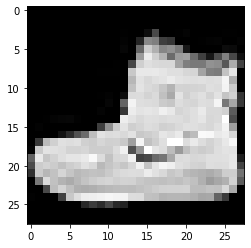

In [77]:
plt.imshow(train_images[0], cmap="gray")

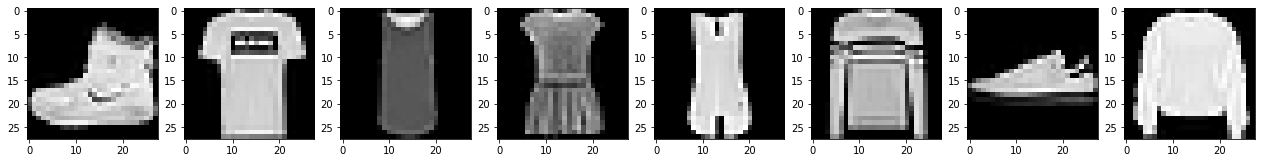

In [81]:
figure, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=8)
for i in range(8):
    axes[i].imshow(train_images[i], cmap="gray")

* 데이터 전처리

In [114]:
train_images = np.array(train_images/255.0, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)

In [115]:
test_images = np.array(test_images/255.0, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

* 모델 생성

In [116]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(50, activation='sigmoid'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


* 모델 학습(loss, optimizer 설정)

In [109]:
from tensorflow.keras.optimizers import Adam

In [117]:
model.compile(optimizer=SGD(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [118]:
train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

In [119]:
history = model.fit(x=train_images, y=train_oh_labels, validation_split=0.2, batch_size=100, epochs=17, verbose=1)

Epoch 1/17
480/480 [==============================] - 1s 2ms/step - loss: 1.0280 - accuracy: 0.7081 - val_loss: 0.6907 - val_accuracy: 0.7673
Epoch 2/17
480/480 [==============================] - 1s 1ms/step - loss: 0.6245 - accuracy: 0.7905 - val_loss: 0.5709 - val_accuracy: 0.7995
Epoch 3/17
480/480 [==============================] - 1s 1ms/step - loss: 0.5422 - accuracy: 0.8145 - val_loss: 0.5171 - val_accuracy: 0.8167
Epoch 4/17
480/480 [==============================] - 1s 1ms/step - loss: 0.5008 - accuracy: 0.8277 - val_loss: 0.4869 - val_accuracy: 0.8280
Epoch 5/17
480/480 [==============================] - 1s 1ms/step - loss: 0.4744 - accuracy: 0.8357 - val_loss: 0.4653 - val_accuracy: 0.8349
Epoch 6/17
480/480 [==============================] - 1s 2ms/step - loss: 0.4562 - accuracy: 0.8396 - val_loss: 0.4546 - val_accuracy: 0.8369
Epoch 7/17
480/480 [==============================] - 1s 2ms/step - loss: 0.4418 - accuracy: 0.8456 - val_loss: 0.4420 - val_accuracy: 0.8405
Epoch 

* 시험데이터로 예측

In [120]:
predict_prob = model.predict(test_images) 

In [121]:
predict_prob[0]

array([1.01758524e-04, 2.30057940e-05, 2.28407313e-04, 1.43458179e-04,
       8.11273421e-05, 7.52789080e-02, 3.62706283e-04, 1.77370533e-01,
       6.07782090e-03, 7.40332365e-01], dtype=float32)

* 시험 데이터로 평가

In [122]:
model.evaluate(test_images, test_oh_labels, batch_size=100)

100/100 [==============================] - 0s 1ms/step - loss: 0.4168 - accuracy: 0.8522


[0.41678178310394287, 0.8521999716758728]